In [1]:
#install.packages('randomForest')
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)


Warning message:
"package 'randomForest' was built under R version 4.0.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::combine()  masks randomForest::combine()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()
x ggplot2::margin() masks randomForest::margin()

Warning message:
"package 'caret' was built under R version 4.0.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package

# Classification

In [25]:
df.wa = read.csv(file = "../../results/df-water-access.csv")
df.explore = read.csv(file = "../../results/df-water-explore.csv")
df = read.csv(file = "../../results/dfsimple.csv")
head(df.wa)
df.explore$clusters <- as.factor(df$clusters)
head(df.explore)

,X,Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3
2,2,Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8
3,3,Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3
4,4,Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3
5,5,Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0
6,6,Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3


,X,Country,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp,bicy,acar,mcyc,pcar,boat,wigc,clusters
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Afghanistan,71.2,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3,30.0,5.8,35.2,11.8,0.0,0.1,1
2,2,Albania,98.4,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9,26.4,3.2,9.6,37.0,0.7,0.1,2
3,3,Angola,66.9,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5,4.6,1.3,17.8,10.9,0.4,0.3,3
4,4,Armenia,99.9,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6,8.6,0.4,0.2,39.2,0.3,0.1,2
5,5,Azerbaijan,90.6,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9,6.9,3.3,1.1,20.4,0.1,0.0,4
6,6,Bangladesh,97.8,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5,25.1,0.0,6.4,0.8,0.0,0.3,1


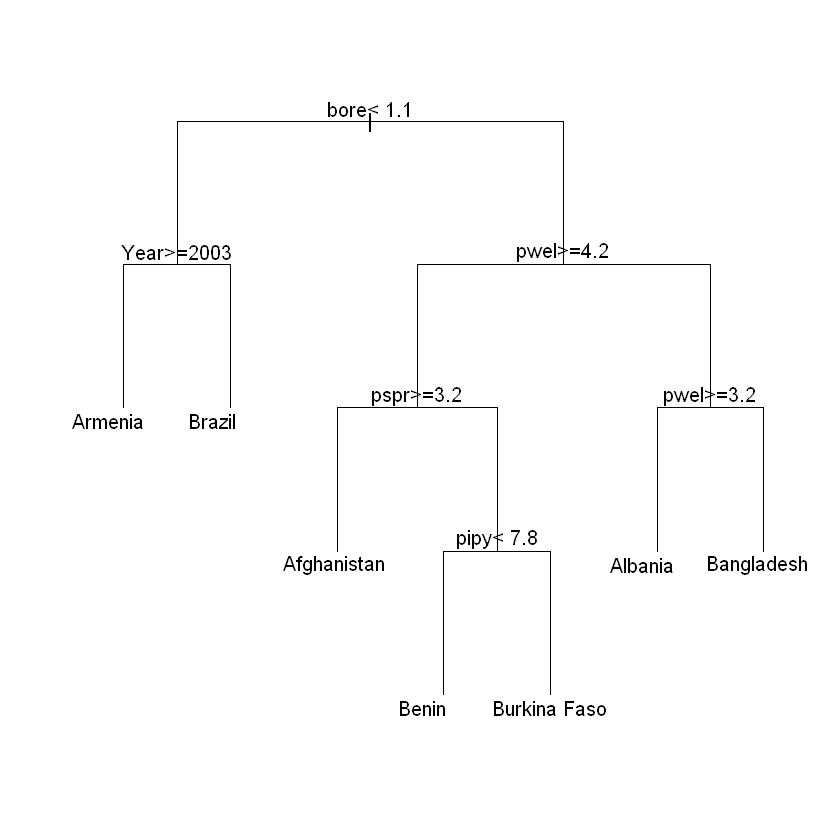

In [3]:
model <- rpart(Country ~., data = df)
par(xpd = NA) # otherwise on some devices the text is clipped
plot(model)
text(model, digits = 3)

The different rules in tree can be printed as follow:

In [4]:
print(model, digits = 2)

n= 78 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 78 77 Afghanistan (0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013)  
   2) bore< 1.1 25 24 Armenia (0 0 0 0.04 0 0 0 0.04 0.04 0 0.04 0 0 0.04 0 0 0.04 0 0 0 0.04 0.04 0.04 0 0 0.04 0 0 0.04 0 0.04 0.04 0 0 0 0.04 0.04 0 0 0 0 0 0 0.04 0 0.04 0 0.04 0 0 0 0 0.04 0 0 0 0 0.04 0.04 0 0 0.04 0 0 0 0 0 0 0 0 0.04 0 0 0.04 0.04 0 0 0)  
     4) Year>=2e+03 16 15 Armenia (0 0 0 0.062 0 0 0 0.062 0 0 0.062 0 0 0 0 0 0.062 0 0 0 0.062 0.062 0 0 0 0.062 0 0 0.062 0 0.062 0.062 0 0 0 0.062 0 0 0 0 0

These rules are produced by repeatedly splitting the predictor variables, starting with the variable that has the highest association with the response variable. The process continues until some predetermined stopping criteria are met.

# Example of data set

In [5]:
# Inspect the data
sample_n(df, 3)
# Split the data into training and test set
set.seed(123)
training.samples <- df$clusters %>% 
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- df[training.samples, ]
test.data <- df[-training.samples, ]




Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc,clusters
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Niger,2012,DHS,67.1,2.7,4.5,24.5,14.8,20.4,0.1,...,10.7,54.4,33.2,8.6,21.5,10.9,2.0,0.0,0.5,1
Malawi,2017,MIS,86.3,3.7,5.8,13.6,55.4,5.5,0.2,...,14.4,70.2,12.4,35.7,2.0,2.8,2.2,0.3,0.5,1
Gambia,2013,DHS,91.0,3.4,38.2,32.8,8.8,7.4,0.0,...,46.1,48.7,4.5,47.0,15.7,7.1,11.2,0.4,0.2,3


Fully grown trees
Here, we’ll create a fully grown tree showing all predictor variables in the data set.


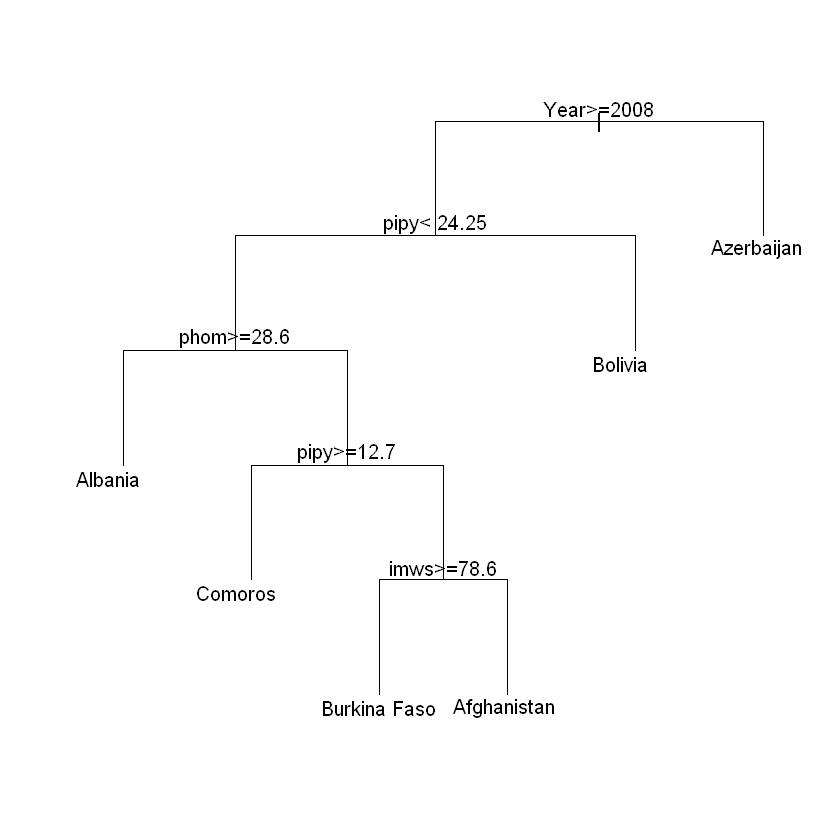

In [6]:
# Build the model
set.seed(123)
model1 <- rpart(Country ~., data = train.data, method = "class")
# Plot the trees
par(xpd = NA) # Avoid clipping the text in some device
plot(model1)
text(model1, digits = 3)

In [7]:
# Make predictions on the test data
predicted.classes <- model1 %>% 
  predict(test.data, type = "class")
head(predicted.classes)

3            6           11           12           22           25 
 Afghanistan Burkina Faso Burkina Faso Burkina Faso      Albania      Comoros 
64 Levels: Afghanistan Albania Armenia Azerbaijan Benin Bolivia ... Zimbabwe

In [8]:
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Zero is not good, something went wrong, ask the professor for help potentially. 

[1] 0

# Pruning the tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


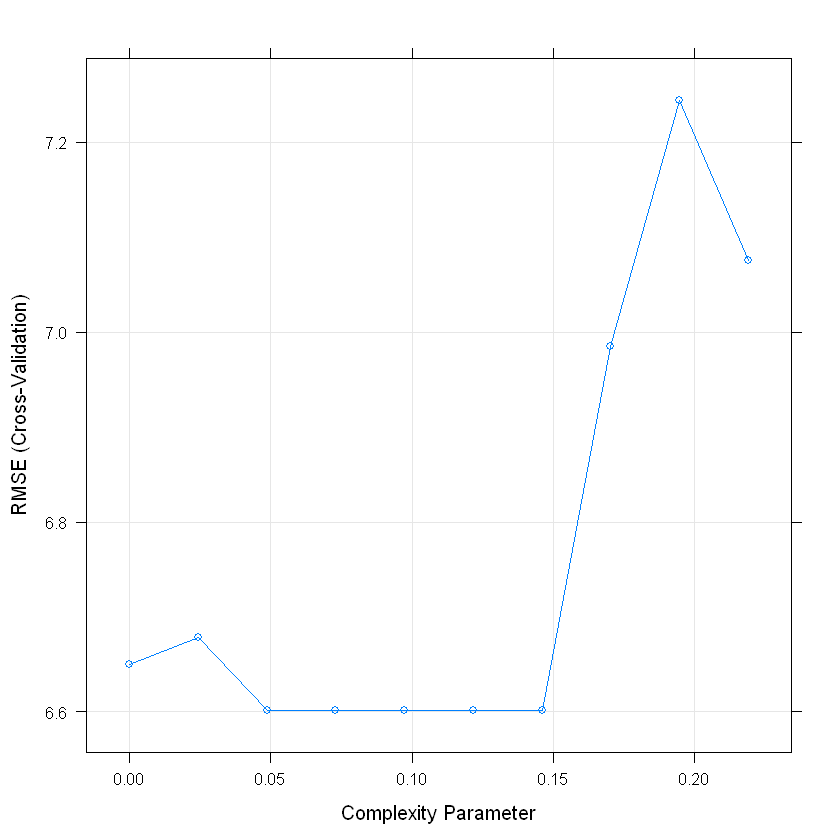

In [9]:
# Fit the model on the training set
set.seed(123)
model2 <- train(
  acar ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model accuracy vs different values of
# cp (complexity parameter)
plot(model2)

RMSE is computed as RMSE = mean((observeds - predicteds)^2) %>% sqrt(). The lower the RMSE, the better the model.

In [10]:
# Print the best tuning parameter cp that
# maximizes the model accuracy
model2$bestTune

,cp
,<dbl>
7,0.1460321


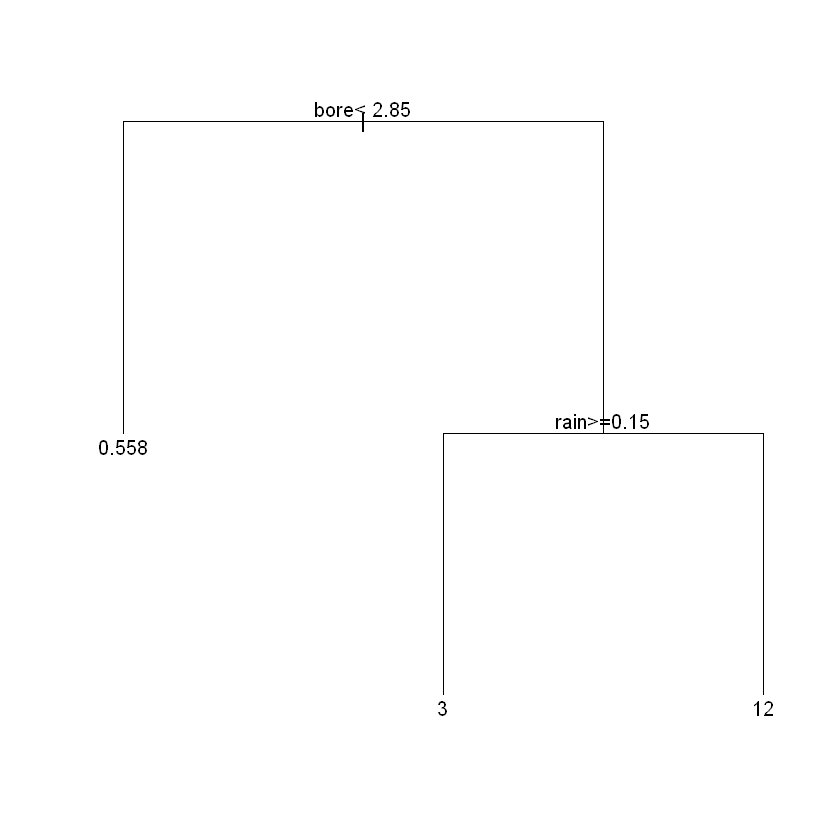

In [11]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model2$finalModel)
text(model2$finalModel,  digits = 3)

In [12]:
# Decision rules in the model
model2$finalModel

n= 64 

node), split, n, deviance, yval
      * denotes terminal node

1) root 64 3668.59700  4.2140620  
  2) bore< 2.85 31   35.27548  0.5580645 *
  3) bore>=2.85 33 2829.72200  7.6484850  
    6) rain>=0.15 16  217.76000  3.0000000 *
    7) rain< 0.15 17 1940.83100 12.0235300 *

# Make predictions on the test data
predicted.classes <- model2 %>% predict(test.data)
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Must understand what these function of codes actually implment. 

# Create the regression tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


,cp
,<dbl>
7,0.1460321


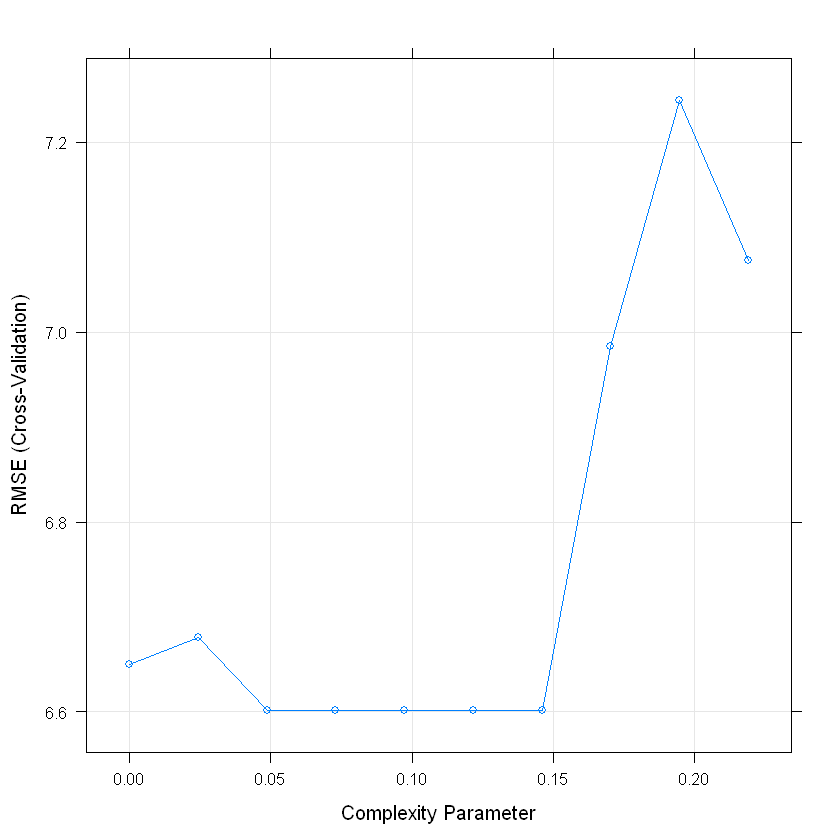

In [13]:
# Fit the model on the training set
set.seed(123)
model <- train(
  acar ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model error vs different values of
# cp (complexity parameter)
plot(model)
# Print the best tuning parameter cp that
# minimize the model RMSE
model$bestTune

Here, the best cp value is the one that minimize the prediction error RMSE (root mean squared error).

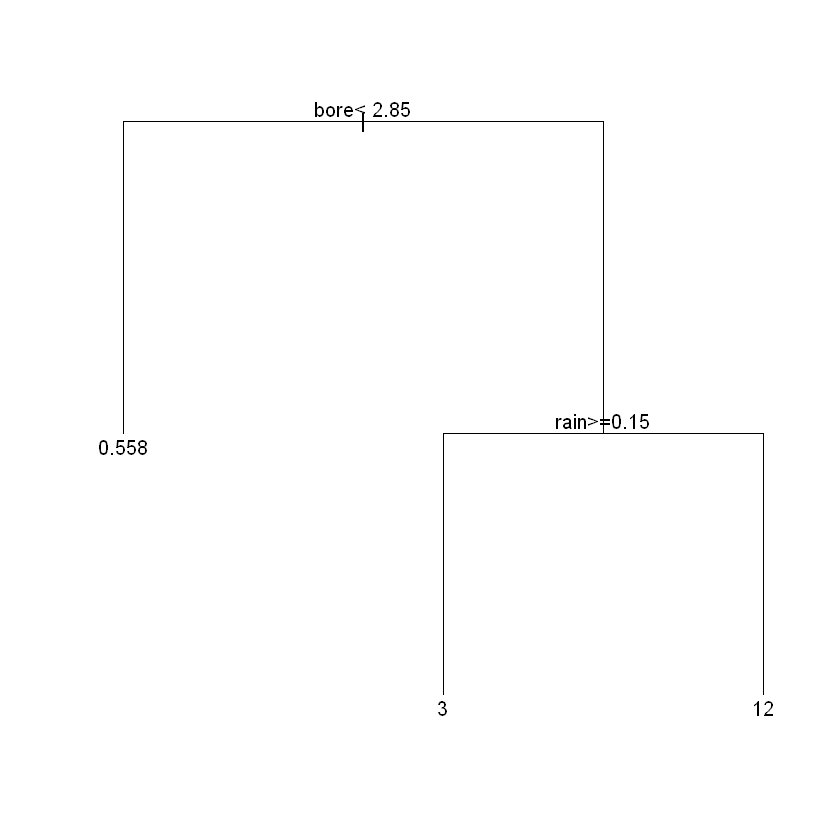

In [14]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model$finalModel)
text(model$finalModel, digits = 3)

# Decision rules in the model
model$finalModel
# Make predictions on the test data
predictions <- model %>% predict(test.data)
head(predictions)
# Compute the prediction error RMSE
RMSE(predictions, test.data$Country)

# Conditionnal inference tree

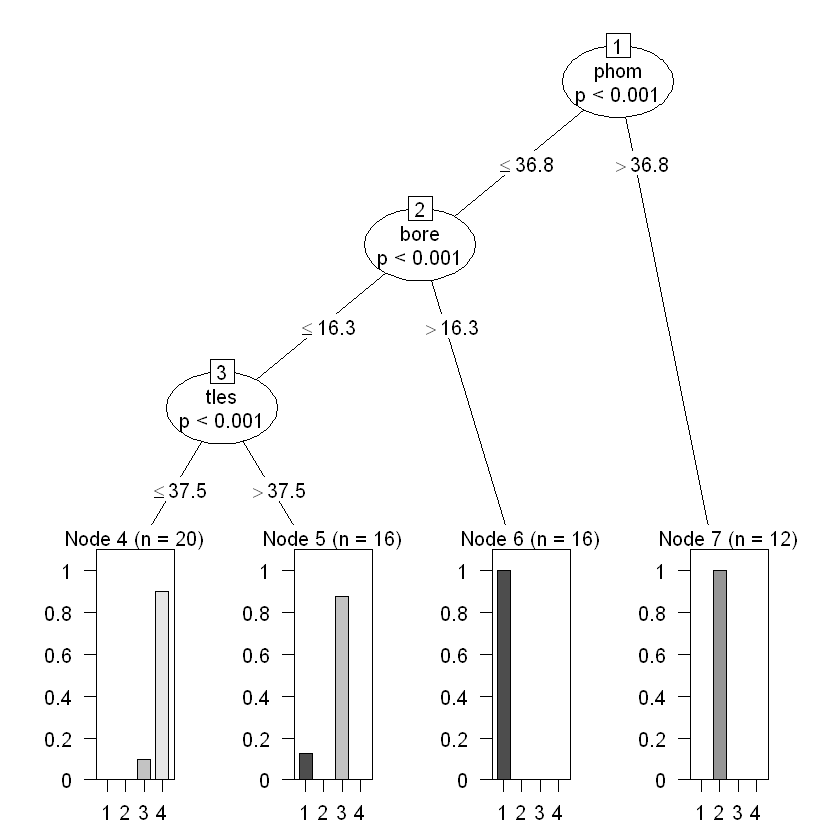

In [15]:
set.seed(123)
model <- train(
  clusters ~., data = train.data, method = "ctree2",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(maxdepth = 3, mincriterion = 0.95 )
  )
plot(model$finalModel)

Reference: http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/

# Fitting Classification Trees

Reference: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf (338)
https://www.datacamp.com/community/tutorials/decision-trees-R
Random Forest:
https://cran.r-project.org/web/packages/randomForest/randomForest.pdf

In [26]:
names(df.explore)

[1] "X"        "Country"  "imws"     "pipy"     "truc"     "ctan"    
 [7] "bott"     "uiws"     "othw"     "iwsp"     "basw"     "liws"    
[13] "watp"     "bicy"     "acar"     "mcyc"     "pcar"     "boat"    
[19] "wigc"     "clusters"

ERROR: Error in hist.default(df$clusters): 'x' must be numeric


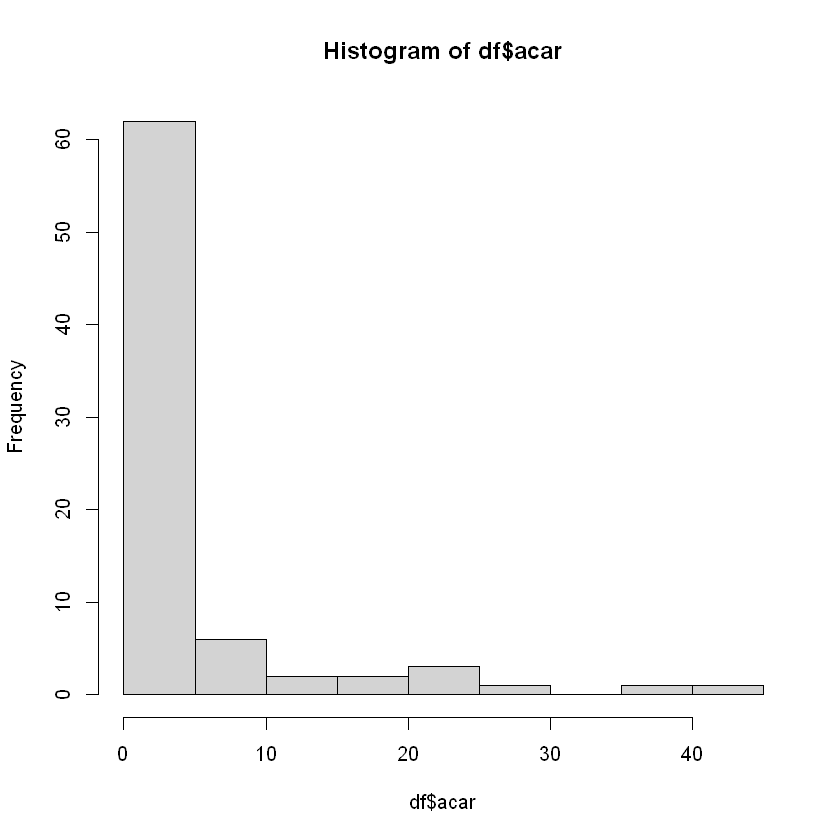

In [17]:
hist(df$acar)
hist(df$clusters)

In [18]:
#High = ifelse(df$acar <= 10 , "No", "Yes")
#df = data.frame(df, High)

In [33]:
tree.wa = tree(clusters ~ . -X - Country  , data = df.explore)
head(df.explore)
# We must figure out the NAs introduced by coercion meaning before preceeding this sections

,X,Country,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp,bicy,acar,mcyc,pcar,boat,wigc,clusters
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Afghanistan,71.2,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3,30.0,5.8,35.2,11.8,0.0,0.1,1
2,2,Albania,98.4,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9,26.4,3.2,9.6,37.0,0.7,0.1,2
3,3,Angola,66.9,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5,4.6,1.3,17.8,10.9,0.4,0.3,3
4,4,Armenia,99.9,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6,8.6,0.4,0.2,39.2,0.3,0.1,2
5,5,Azerbaijan,90.6,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9,6.9,3.3,1.1,20.4,0.1,0.0,4
6,6,Bangladesh,97.8,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5,25.1,0.0,6.4,0.8,0.0,0.3,1


In [31]:
summary(tree.wa)


Classification tree:
tree(formula = clusters ~ . - X - Country, data = df.explore)
Variables actually used in tree construction:
[1] "pcar" "liws" "mcyc" "basw" "truc" "pipy" "bicy" "ctan" "othw"
Number of terminal nodes:  11 
Residual mean deviance:  0.6957 = 46.62 / 67 
Misclassification error rate: 0.141 = 11 / 78 

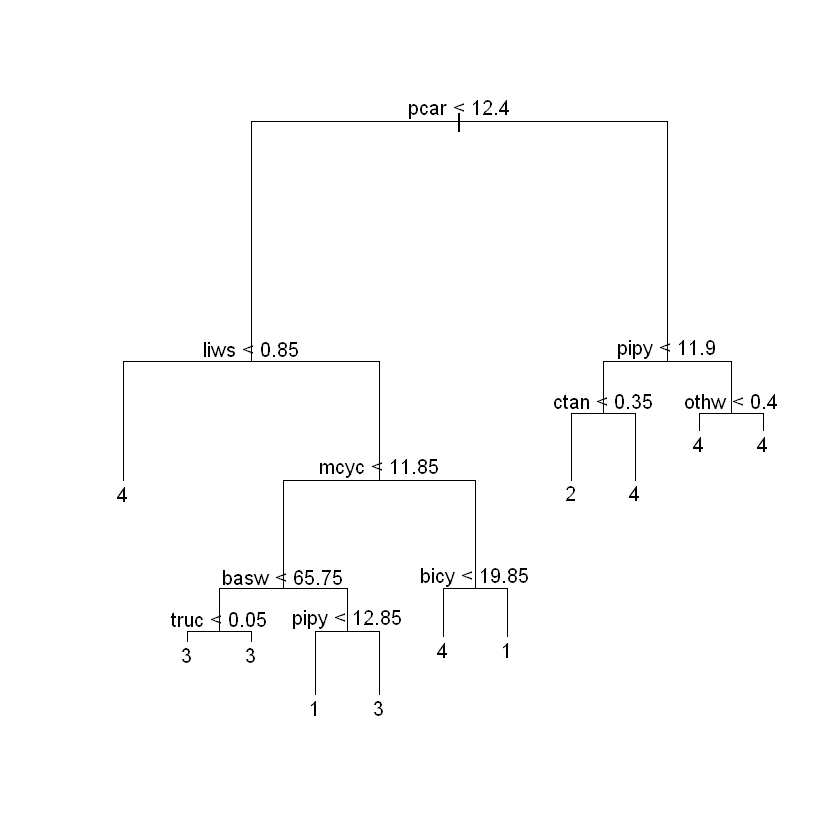

In [32]:
plot(tree.wa)
text(tree.wa, pretty = 0)

In [22]:
tree.wa

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 78 213.900 1 ( 0.28205 0.17949 0.25641 0.28205 )  
   2) tles < 30.65 39  77.400 4 ( 0.07692 0.35897 0.02564 0.53846 )  
     4) phom < 38.15 25  26.480 4 ( 0.12000 0.00000 0.04000 0.84000 )  
       8) bore < 15.1 20   7.941 4 ( 0.00000 0.00000 0.05000 0.95000 )  
        16) imws < 72.45 5   5.004 4 ( 0.00000 0.00000 0.20000 0.80000 ) *
        17) imws > 72.45 15   0.000 4 ( 0.00000 0.00000 0.00000 1.00000 ) *
       9) bore > 15.1 5   6.730 1 ( 0.60000 0.00000 0.00000 0.40000 ) *
     5) phom > 38.15 14   0.000 2 ( 0.00000 1.00000 0.00000 0.00000 ) *
   3) tles > 30.65 39  61.980 1 ( 0.48718 0.00000 0.48718 0.02564 )  
     6) bore < 11.55 18   7.724 3 ( 0.00000 0.00000 0.94444 0.05556 )  
      12) imws < 81.05 13   0.000 3 ( 0.00000 0.00000 1.00000 0.00000 ) *
      13) imws > 81.05 5   5.004 3 ( 0.00000 0.00000 0.80000 0.20000 ) *
     7) bore > 11.55 21  13.210 1 ( 0.90476 0.00000 0.09524 0.00000 )

Training Session

In [ ]:
set.seed(101)
train=sample(1:nrow(df), 59)

In [ ]:
tree.wa = tree(clusters ~ . - Country - Year - Survey , data = df)
plot(tree.wa)
text(tree.wa, pretty=0)

In [ ]:
tree.pred = predict(tree.wa, df[-train,], type="class")

Finally, we use the data.frame() function to merge High with the rest of
the borehole (bore) data.

# define function that reruns factor() for the right columns
rerun_factor <- function(x) {
  if (is.factor(x)) return(factor(x))
  return(x)
}

# run on all columns of your data
df <- as.data.frame(lapply(df, rerun_factor))

In [ ]:
set.seed(2)
train=sample(1:nrow(df), 78)
df.test=df[-train,]
High.test=High[-train]
tree.df =tree(clusters ~ . - Country - Year - survey,df,subset=train)
summary(tree.df)
tree.pred=predict(tree.df,df.test,type="class")
table(tree.pred,High.test)
plot(tree.df)
# Unsure what trees cannot handle multiple responses mean

# Random Forest

To prepare data for random forest, let's set the seed and create a sample training set of 300 observations.

In [ ]:
set.seed(101)
train = sample(1:nrow(df), 78)
head(train)

In [ ]:
rf.water = randomForest(acar~., data = df, subset = train)
rf.water

Printing out the random forest gives its summary: the # of trees (500 were grown), the mean squared residuals (MSR), and the percentage of variance explained. The MSR and % variance explained are based on the out-of-bag estimates, a very clever device in random forests to get honest error estimates.

In [ ]:
count(df)
head(df)